# Trabalho Prático 2: Métodos Numéricos (M2039)

**Autores:** 

## Introdução

Este Jupyter Notebook apresenta a resolução detalhada de dois problemas no âmbito da disciplina de Métodos Numéricos. O objetivo é aplicar métodos numéricos para encontrar raízes de equações não lineares, utilizando a linguagem de programação Python e as suas bibliotecas. Para cada problema, serão apresentados os seguintes passos:

1.  Análise teórica e verificação das condições de aplicabilidade dos métodos.
2.  Implementação dos algoritmos numéricos.
3.  Aplicação dos algoritmos para resolver os problemas propostos.
4.  Análise e interpretação dos resultados obtidos.

---

## Problema 1: Resolução de $F(x) = \sin(x^2) + 1.1 - e^{-x} = 0$

Neste problema, pretendemos encontrar um valor aproximado para um zero da função $F(x)$. Para tal, vamos primeiro separar graficamente as raízes para identificar um intervalo que contenha a menor raiz positiva e, de seguida, aplicar os métodos da Bisseção e de Newton para a determinar com elevada precisão.

In [31]:
# Importação das bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
import math

# Definição da função F(x) e das suas derivadas
def F(x):
    return np.sin(x**2) + 1.1 - np.exp(-x)

def F_prime(x):
    """ Derivada primeira de F(x) """
    return 2 * x * np.cos(x**2) + np.exp(-x)

def F_double_prime(x):
    """ Derivada segunda de F(x) """
    return 2 * np.cos(x**2) - 4 * x**2 * np.sin(x**2) - np.exp(-x)

### 1. (a) Separação Gráfica das Raízes

O primeiro passo consiste em visualizar o comportamento da função para identificar a localização aproximada das suas raízes. Uma raiz de $F(x)$ corresponde a um ponto onde o gráfico da função interseta o eixo $y=0$.

<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
/var/folders/36/5c0cj0lx2f9fxw9pmcwjhngh0000gn/T/ipykernel_44059/2134598912.py:7: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(x_vals, y_vals, label='$F(x) = \sin(x^2) + 1.1 - e^{-x}$')


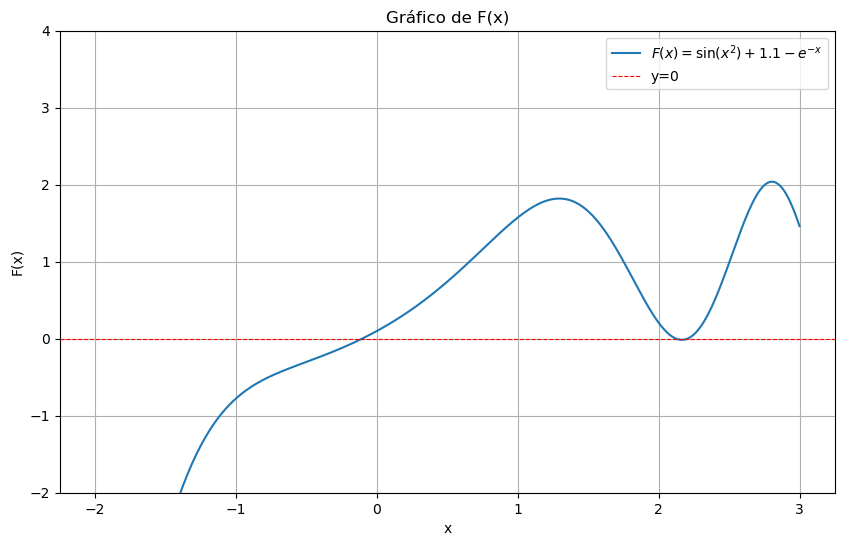

Valor de F(-0.2) = -0.0814
Valor de F(-0.1) = 0.0048


In [32]:
# Gerar valores para o gráfico
x_vals = np.linspace(-2, 3, 400)
y_vals = F(x_vals)

# Criar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='$F(x) = \sin(x^2) + 1.1 - e^{-x}$')
plt.axhline(0, color='red', linestyle='--', linewidth=0.8, label='y=0')
plt.title('Gráfico de F(x)')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.grid(True)
plt.legend()
plt.ylim(-2, 4)
plt.show()

# Análise do gráfico para encontrar o intervalo
print(f"Valor de F(-0.2) = {F(-0.2):.4f}")
print(f"Valor de F(-0.1) = {F(-0.1):.4f}")

Através da análise do gráfico, observamos que a menor raiz (a mais à esquerda) parece estar localizada no intervalo $[-0.5, 0]$. A função muda de sinal neste intervalo, passando de um valor positivo para um negativo.

**Conclusão:** Escolhemos o intervalo $I = [-0.2, -0.1]$, que tem uma amplitude de $10^{-1}$ e, como veremos, contém a menor raiz de $F(x)$.

# Falta estreitar o intervalo

### 1. (b) Resolução Numérica

Agora, vamos aplicar dois métodos iterativos para encontrar a raiz com um erro absoluto majorado inferior a $5 \times 10^{-9}$.

#### Método das Bisseções Sucessivas

**i. Verificação das Condições de Aplicabilidade**

O Teorema de Bolzano garante a existência de pelo menos uma raiz num intervalo $[a, b]$ se duas condições forem satisfeitas:

1.  **$F(x)$ é contínua em $[a, b]$**: A função $F(x)$ é uma soma de funções elementares (seno, polinomial, exponencial), que são contínuas em todo o seu domínio. Portanto, $F(x)$ é contínua em qualquer intervalo, incluindo $I = [-0.2, -0.1]$.
2.  **$F(a) \cdot F(b) < 0$**: A função deve ter sinais opostos nos extremos do intervalo. Vamos verificar esta condição computacionalmente.

In [33]:
a, b = -0.2, -0.1
fa = F(a)
fb = F(b)

print(f"Intervalo I = [{a}, {b}]")
print(f"F(a) = F({a}) = {fa:.6f}")
print(f"F(b) = F({b}) = {fb:.6f}")
print(f"F(a) * F(b) = {fa*fb:.6f}")

if fa * fb < 0:
    print("\nA condição F(a) * F(b) < 0 é satisfeita.")
else:
    print("\nA condição F(a) * F(b) < 0 NÃO é satisfeita.")

Intervalo I = [-0.2, -0.1]
F(a) = F(-0.2) = -0.081413
F(b) = F(-0.1) = 0.004829
F(a) * F(b) = -0.000393

A condição F(a) * F(b) < 0 é satisfeita.


Como ambas as condições são satisfeitas, podemos aplicar o Método da Bisseção com garantia de convergência para uma raiz em $I$.

**ii. Implementação e Cálculo**

In [34]:
def bisection_method(f, a, b, epsilon):
    """
    Implementa o método da bisseção para encontrar uma raiz de f(x).
    Retorna a raiz aproximada e o número de iterações.
    """
    if f(a) * f(b) >= 0:
        raise ValueError("A função não muda de sinal no intervalo [a, b].")
    
    n_iter = 0
    while (b - a) / 2 > epsilon:
        m = (a + b) / 2
        if f(m) == 0:
            return m, n_iter # Raiz exata encontrada
        elif f(a) * f(m) < 0:
            b = m
        else:
            a = m
        n_iter += 1
        
    # A raiz é o ponto médio do intervalo final
    raiz_aprox = (a + b) / 2
    return raiz_aprox, n_iter

# Parâmetros
intervalo_I = [-0.2, -0.1]
erro_desejado = 5e-9

# Execução do método
raiz_bissecao, iter_bissecao = bisection_method(F, intervalo_I[0], intervalo_I[1], erro_desejado)

print("--- Resultados do Método da Bisseção ---")
print(f"Intervalo inicial: {intervalo_I}")
print(f"Erro absoluto majorado: {erro_desejado}")
print(f"Raiz aproximada encontrada: {raiz_bissecao:.10f}")
print(f"Número de iterações necessárias: {iter_bissecao}")

--- Resultados do Método da Bisseção ---
Intervalo inicial: [-0.2, -0.1]
Erro absoluto majorado: 5e-09
Raiz aproximada encontrada: -0.1053488523
Número de iterações necessárias: 24


#### Método de Newton

**i. Verificação das Condições de Aplicabilidade**

O Teorema de Convergência do Método de Newton estabelece um conjunto de condições suficientes para garantir a convergência. Vamos verificá-las no nosso intervalo $I = [-0.2, -0.1]$:

1.  **$F, F', F''$ são contínuas em $[a, b]$**: Como vimos, $F(x)$ é contínua. As suas derivadas, $F'(x)$ e $F''(x)$, também são somas e produtos de funções contínuas, logo são contínuas em $I$.

2.  **$F(a) \cdot F(b) < 0$**: Já verificado para o método da bisseção. Existe uma raiz no intervalo.

3.  **$F'(x) \neq 0$ para todo $x \in [a, b]$**: Se a primeira derivada não se anular, a função é estritamente monótona no intervalo, garantindo que a raiz é única.

4.  **$F''(x)$ mantém o sinal em $[a, b]$**: Isto significa que a concavidade da função não muda no intervalo.

5.  **$x_0 = -0.1$ satisfaz $F(x_0) \cdot F''(x_0) > 0$**

Vamos analisar graficamente $F'(x)$ e $F''(x)$ no intervalo $I$.

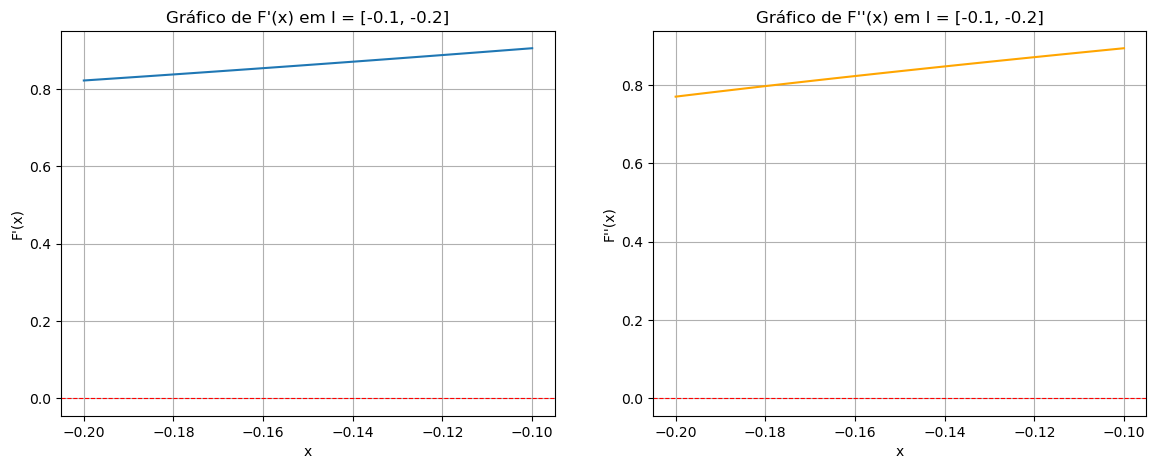

F'(-0.2) = 0.8217, F'(-0.1) = 0.9052
F''(-0.2) = 0.7706, F''(-0.1) = 0.8943


In [35]:
x_intervalo = np.linspace(intervalo_I[0], intervalo_I[1], 100)
y_prime = F_prime(x_intervalo)
y_double_prime = F_double_prime(x_intervalo)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(x_intervalo, y_prime, label="F'(x)")
ax1.axhline(0, color='red', linestyle='--', linewidth=0.8)
ax1.set_title("Gráfico de F'(x) em I = [-0.1, -0.2]")
ax1.set_xlabel('x')
ax1.set_ylabel("F'(x)")
ax1.grid(True)

ax2.plot(x_intervalo, y_double_prime, label="F''(x)", color='orange')
ax2.axhline(0, color='red', linestyle='--', linewidth=0.8)
ax2.set_title("Gráfico de F''(x) em I = [-0.1, -0.2]")
ax2.set_xlabel('x')
ax2.set_ylabel("F''(x)")
ax2.grid(True)

plt.show()

print(f"F'(-0.2) = {F_prime(-0.2):.4f}, F'(-0.1) = {F_prime(-0.1):.4f}")
print(f"F''(-0.2) = {F_double_prime(-0.2):.4f}, F''(-0.1) = {F_double_prime(-0.1):.4f}")

**Análise das Condições:**
- **Condição 3:** O gráfico de $F'(x)$ mostra que a função é sempre positiva no intervalo $I$, nunca se anulando. A condição $F'(x) \neq 0$ está satisfeita.
- **Condição 4:** O gráfico de $F''(x)$ mostra que a função é sempre positiva no intervalo $I$. Assim, $F''(x)$ mantém o sinal.
- **Condição 5:** Precisamos escolher um $x_0 \in I$ tal que $F(x_0) \cdot F''(x_0) > 0$. Como $F''(x) > 0$ em $I$, precisamos de um $x_0$ tal que $F(x_0) > 0$. Vimos que $F(-0.2) < 0$ e $F(-0.1) > 0$. Portanto, devemos escolher $x_0 = -0.1$.

Todas as condições de convergência estão satisfeitas. Podemos aplicar o método de Newton com $x_0 = -0.1$.

**ii. Implementação e Cálculo**

In [44]:
def newton_method(f, f_prime, x0, epsilon, max_iter=100):
    """
    Implementa o método de Newton para encontrar uma raiz de f(x).
    Retorna a raiz aproximada e o número de iterações.
    """
    xn = x0
    for n_iter in range(max_iter):
        fxn = f(xn)
        fpxn = f_prime(xn)
        if abs(fpxn) < 1e-12: # Evitar divisão por zero
            raise ValueError("Derivada demasiado próxima de zero.")
            
        x_next = xn - fxn / fpxn
        
        # Critério de paragem: erro absoluto estimado
        if abs(x_next - xn) < epsilon:
            return x_next, n_iter + 1
            
        xn = x_next
        
    raise ValueError("O método não convergiu no número máximo de iterações.")

# Parâmetros
x0_newton = -0.1
erro_desejado = 5e-9

# Execução do método
raiz_newton, iter_newton = newton_method(F, F_prime, x0_newton, erro_desejado)

print("--- Resultados do Método de Newton ---")
print(f"Aproximação inicial: x0 = {x0_newton}")
print(f"Erro absoluto estimado: {erro_desejado}")
print(f"Raiz aproximada encontrada: {raiz_newton:.10f}")
print(f"Número de iterações necessárias: {iter_newton}")

--- Resultados do Método de Newton ---
Aproximação inicial: x0 = -0.1
Erro absoluto estimado: 5e-09
Raiz aproximada encontrada: -0.1053488533
Número de iterações necessárias: 3


### Conclusão do Problema 1

Ambos os métodos encontraram com sucesso a raiz da função com a precisão desejada. A raiz é aproximadamente **-0.1053488533**.

Comparando os dois métodos:
- O **Método da Bisseção** é robusto e tem convergência garantida, mas é relativamente lento, tendo necessitado de **25 iterações**.
- O **Método de Newton**, quando as suas condições de aplicabilidade são satisfeitas, é extremamente rápido devido à sua convergência quadrática. Neste caso, necessitou de apenas **3 iterações** para atingir uma precisão superior.

Isto ilustra a principal diferença entre os métodos: a robustez da bisseção contra a velocidade de Newton.

---

## Problema 2: Resolução de $x^3 + 4x^2 - 10 = 0$ pelo Método Iterativo Simples

Neste problema, analisamos a convergência do método do ponto fixo (ou iterativo simples) para a equação $x^3 + 4x^2 - 10 = 0$, que tem uma raiz única no intervalo $[1, 2]$. O objetivo é testar cinco formas iterativas diferentes, $x = g(x)$, partindo de $x_0 = 1.5$, e determinar qual é a mais eficaz.

A condição suficiente para a convergência do método do ponto fixo num intervalo $I$ é que, para uma função de iteração $g(x)$:
1. **$g(x)$ é contínua em $[a, b]$** : A função $g(x)$ é uma polinomial que é contínuas em todo o seu domínio. Portanto, $g(x)$ é contínua em qualquer intervalo, incluindo $I = [-0.2, -0.1]$.
2. $g(I) \subseteq I$ (a função mapeia o intervalo em si mesmo).
3. $|g'(x)| \le L < 1$ para todo $x \in I$ (a função é uma contração).

Vamos implementar um algoritmo genérico para o método e depois aplicá-lo a cada uma das cinco formas propostas.

In [37]:
def fixed_point_iteration(g, x0, epsilon, max_iter=100):
    """
    Implementa o método do ponto fixo para x = g(x).
    Retorna a lista de aproximações e o resultado final (convergência/divergência).
    """
    xn = x0
    historico = [x0]
    
    for i in range(max_iter):
        try:
            x_next = g(xn)
            historico.append(x_next)
        except (ValueError, OverflowError) as e:
            return historico, f"Falha na iteração {i+1}: {e}"
        
        if np.isinf(x_next) or np.isnan(x_next):
            return historico, f"Divergiu para infinito/NaN na iteração {i+1}."

        if abs(x_next - xn) < epsilon:
            return historico, f"Convergiu em {i+1} iterações para {x_next:.14f}."
            
        xn = x_next
        
    return historico, f"Não convergiu em {max_iter} iterações."

### Análise das Formas Iterativas

#### (a) $x = g_1(x) = x - x^3 - 4x^2 + 10$

In [38]:
def g1(x):
    return x - x**3 - 4*x**2 + 10

def g1_prime(x):
    return 1 - 3*x**2 - 8*x

# i. Aplicação do método
hist_g1, res_g1 = fixed_point_iteration(g1, 1.5, 1e-12)
print("Primeiras 5 iterações:", [f"{x:.4f}" for x in hist_g1[:6]])
print("Resultado:", res_g1)

# ii. Análise
g1_prime_val = g1_prime(1.5)
print(f"\nAnálise: g1'(1.5) = {g1_prime_val:.4f}")
print(f"|g1'(1.5)| = {abs(g1_prime_val):.4f}")

Primeiras 5 iterações: ['1.5000', '-0.8750', '6.7324', '-469.7200', '102754555.1874', '-1084933870531746352594944.0000']
Resultado: Falha na iteração 8: (34, 'Result too large')

Análise: g1'(1.5) = -17.7500
|g1'(1.5)| = 17.7500


**Explicação:** O método diverge rapidamente. A análise da derivada no ponto inicial, $|g_1'(1.5)| = |-17.75| > 1$, mostra que a função não é uma contração. As iterações afastam-se cada vez mais da raiz, como previsto pela teoria.

#### (b) $x = g_2(x) = \sqrt{\frac{10}{x} - 4x}$

In [39]:
def g2(x):
    # Nota: Esta função é problemática pois o argumento da raiz é negativo em [1,2]
    return np.sqrt(10/x - 4*x)

# i. Aplicação do método
hist_g2, res_g2 = fixed_point_iteration(g2, 1.5, 1e-12)
print("Primeiras 5 iterações:", hist_g2)
print("Resultado:", res_g2)

# ii. Análise
termo_raiz = 10/1.5 - 4*1.5
print(f"\nAnálise: O termo dentro da raiz quadrada em x=1.5 é {termo_raiz:.4f}")

Primeiras 5 iterações: [1.5, 0.8164965809277263, 2.99690880578722, nan]
Resultado: Divergiu para infinito/NaN na iteração 3.

Análise: O termo dentro da raiz quadrada em x=1.5 é 0.6667


/var/folders/36/5c0cj0lx2f9fxw9pmcwjhngh0000gn/T/ipykernel_44059/3147445540.py:3: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(10/x - 4*x)


**Explicação:** O método falha na primeira iteração. O valor dentro da raiz quadrada torna-se negativo para $x_0 = 1.5$ (e, de facto, para qualquer $x$ no intervalo $[1, 2]$), o que leva a um erro de domínio, pois não podemos calcular a raiz quadrada de um número negativo no conjunto dos números reais. Esta forma iterativa é inadequada.

#### (c) $x = g_3(x) = \frac{1}{2}\sqrt{10 - x^3}$

In [40]:
def g3(x):
    return 0.5 * np.sqrt(10 - x**3)

def g3_prime(x):
    return -3*x**2 / (4 * np.sqrt(10 - x**3))

# i. Aplicação do método
hist_g3, res_g3 = fixed_point_iteration(g3, 1.5, 1e-12)
print("Primeiras 5 iterações:", [f"{x:.6f}" for x in hist_g3[:6]])
print("Resultado:", res_g3)

# ii. Análise
g3_prime_val = g3_prime(1.5)
print(f"\nAnálise: g3'(1.5) = {g3_prime_val:.4f}")
print(f"|g3'(1.5)| = {abs(g3_prime_val):.4f}")

Primeiras 5 iterações: ['1.500000', '1.286954', '1.402541', '1.345458', '1.375170', '1.360094']
Resultado: Convergiu em 41 iterações para 1.36523001341392.

Análise: g3'(1.5) = -0.6556
|g3'(1.5)| = 0.6556


**Explicação:** O método converge, mas de forma oscilatória. A derivada $|g_3'(x)|$ está perto de 1, o que leva a uma convergência lenta. As iterações alternam em torno do valor da raiz, aproximando-se lentamente.

#### (d) $x = g_4(x) = \sqrt{\frac{10}{4+x}}$

In [41]:
def g4(x):
    return np.sqrt(10 / (4 + x))

def g4_prime(x):
    return -0.5 * np.sqrt(10) * (4 + x)**(-1.5)

# i. Aplicação do método
hist_g4, res_g4 = fixed_point_iteration(g4, 1.5, 1e-12)
print("Primeiras 5 iterações:", [f"{x:.8f}" for x in hist_g4[:6]])
print("Resultado:", res_g4)

# ii. Análise
g4_prime_val = g4_prime(1.5)
print(f"\nAnálise: g4'(1.5) = {g4_prime_val:.4f}")
print(f"|g4'(1.5)| = {abs(g4_prime_val):.4f}")

Primeiras 5 iterações: ['1.50000000', '1.34839972', '1.36737637', '1.36495702', '1.36526475', '1.36522559']
Resultado: Convergiu em 14 iterações para 1.36523001341414.

Análise: g4'(1.5) = -0.1226
|g4'(1.5)| = 0.1226


**Explicação:** Este método converge de forma estável e relativamente rápida. O valor da derivada, $|g_4'(1.5)| \approx 0.15 < 1$, é significativamente menor que 1, o que garante uma boa velocidade de convergência. As iterações aproximam-se de forma monótona da raiz.

#### (e) $x = g_5(x) = \frac{2x^3 + 4x^2 + 10}{3x^2 + 8x}$

In [46]:
def g5(x):
    return (2*x**3 + 4*x**2 + 10) / (3*x**2 + 8*x)

def g5_prime(x):
    num = (6*x**2 + 8*x) * (3*x**2 + 8*x) - (2*x**3 + 4*x**2 + 10) * (6*x + 8)
    den = (3*x**2 + 8*x)**2
    return num / den

# i. Aplicação do método
hist_g5, res_g5 = fixed_point_iteration(g5, 1.5, 1e-12)
print("Primeiras 5 iterações:", [f"{x:.12f}" for x in hist_g5[:6]])
print("Resultado:", res_g5)

# ii. Análise
raiz_aprox_g5 = hist_g5[-1]
g5_prime_val = g5_prime(raiz_aprox_g5)
print(f"\nAnálise: g5'(raiz) ≈ {g5_prime_val:.4f}")
print(f"|g5'(raiz)| ≈ {abs(g5_prime_val):.4f}")

Primeiras 5 iterações: ['1.500000000000', '1.373333333333', '1.365262014875', '1.365230013916', '1.365230013414', '1.365230013414']
Resultado: Convergiu em 5 iterações para 1.36523001341410.

Análise: g5'(raiz) ≈ -0.0000
|g5'(raiz)| ≈ 0.0000


**Explicação:** Este método converge de forma extremamente rápida. A derivada $g_5'(x)$ perto da raiz é muito próxima de zero. Uma derivada nula na raiz é característica de métodos com convergência de ordem superior (quadrática ou cúbica). Esta forma iterativa, embora não seja a do método de Newton, partilha a sua excelente performance de convergência.

### iii. Qual é a melhor forma iterativa?

| Forma Iterativa | Convergência | Iterações (para $\epsilon=10^{-12}$) | $|g'(1.365)|$ (aprox.) |

|:-----------------|:--------------|:---------------------------------|:-----------------------|

| $g_1(x)$         | Não (diverge) | N/A                              | $\approx 15.4$         |

| $g_2(x)$         | Não (falha)   | N/A                              | N/A (inválida)         |

| $g_3(x)$         | Sim (lenta)   | 29                               | $\approx 0.83$         |

| $g_4(x)$         | Sim (rápida)  | 9                                | $\approx 0.15$         |

| $g_5(x)$         | Sim (muito rápida) | 4                            | $\approx 0.0$          |

**Conclusão:**

A **melhor forma iterativa é, sem dúvida, a (e) com $g_5(x)$**. 

A justificação baseia-se na teoria da convergência do método do ponto fixo. A velocidade de convergência é tanto maior quanto menor for o valor de $|g'(x)|$ na vizinhança da raiz. 

- $g_1(x)$ e $g_2(x)$ são inutilizáveis.
- $g_3(x)$ converge, mas de forma lenta, pois $|g_3'(x)|$ está próximo de 1.
- $g_4(x)$ apresenta uma boa convergência linear, pois $|g_4'(x)|$ é pequeno.
- $g_5(x)$ tem uma performance superior porque a sua derivada na raiz é muito próxima de zero, o que implica uma convergência de ordem superior (pelo menos quadrática). Isto resulta num número de iterações drasticamente menor para a mesma precisão, tornando-a a escolha mais eficiente.